In [1]:
%run init.ipynb
%run entropy.ipynb
%run ptr.ipynb
%run jupyterQ.ipynb

import qiskit

from qiskit import *

### Sobre medidas não reveladas

<img src="prep.png" width="500">

Consideremos um procedimento experimental que prepara um sistema físico em um determinado estado. A tarefa considerada aqui consiste em terminar, via tomografia de estados, a descrição mais completa do estado preparado. A fim de completar tal tarefa, é possível repetir o procedimento quantas vezes forem necessárias de modo a obter uma tomografia ideal. Logo, no final da tarefa, é possível saber que, toda vez que o procedimento é repetido, a descrição do sistema é dado pelo operador densidade $\rho$. Agora, consideremos a mesma situação na qual temos que determinar em qual estado $\rho$ o sistema foi preparado. No entanto, toda vez repetimos o procedimento, uma medida do observável $\mathcal{O} = \sum_j o_j \Pi^{\mathcal{O}}_j$, com projetores $\Pi^{\mathcal{O}}_j = |o_j \rangle \langle o_j|$ atuando em $\mathcal{H}$, é secretamente realizado entre a preparação e a tomografia. Assim, a M.Q. preve, que após uma medida do observável $\mathcal{O}$, o estado do sistema é dado por
\begin{align}
    \frac{1}{p_{o_j}}\Pi^{\mathcal{O}}_j \rho \Pi^{\mathcal{O}}_j = \frac{1}{p_{o_j}}|o_j \rangle \langle o_j| \rho |o_j \rangle \langle o_j| = \Pi^{\mathcal{O}}_j,
\end{align}
com probabilidade $p_{o_j} = \langle o_j| \rho |o_j \rangle$. Como a medida do observável é realizada secretamente (seja por outro agente ou simplesmente pelo ambiente, afinal, os sistemas físicas não interagem apenas quando estão no laboratório de um físico!!!), depois de realizado inúmeras vezes o mesmo procedimento fazendo tomografia de estados, a melhor descrição que temos do sistema é dado pela média ponderada de todos os possíveis resultados do observável $\mathcal{O}$, ou seja,
\begin{align}
    \Phi_{\mathcal{O}}(\rho) = \sum_j p_{o_j} \Pi^{\mathcal{O}}_j = \sum_j  \Pi^{\mathcal{O}}_j \rho \Pi^{\mathcal{O}}_j.
\end{align}
Assim, segue que a descrição do sistema dada pela equação acima é epistêmica com relação ao observável $\mathcal{O}$, uma vez que as probabilidades $p_{o_j}$ refletem a nossa ignorância sobre o valor real de $\mathcal{O}$ após cada medida. Tal procotolo motivou uma série de artigos formalizando conceitos de fundamentos de Mecânica Quântica, como a noção de 'realidade' (definição) de um observável antes de uma medição.


#### Agora, a pergunta que queremos responder aqui é: como implementamos medidas não-reveladas, ou seja, o mapa $\Phi_{\mathcal{O}}(\rho) = \sum_j  \Pi^{\mathcal{O}}_j \rho \Pi^{\mathcal{O}}_j$ em um computador quântico? 

Uma possível pista é notar que , através do teorema de Stinespring, i.e., que qualquer operação quântica $\Phi$ (que leva operadores densidades em operadores densidades, de certa maneira esse teorema é mais geral, onde $\Phi$ pode ser considerado um canal quântico) é equivalente a uma evolução unitária do sistema de interesse com um sistema auxiliar e futuro discarte do sistema auxiliar
\begin{align}
    \Phi(\rho) = Tr_X (U \rho \otimes |x_0 \rangle \langle x_0 | U^{\dagger}),
\end{align}
onde $U$ é operador de evolução atuando no espaço de Hilbert global $\mathcal{H} \otimes \mathcal{H}_X$ e $X$ é o sistema auxiliar. Esse resultado sugere que medição de um observável emerge a partir da geração dinâmica de correlações entre o sistema e algum informante, i.e., um grau de liberdade capaz de armazenar informação do estado do sistema interesse e então é descartado.


### Implementação de $\Phi_{\mathcal{X}}(\rho)$ onde $\mathcal{X}$ é um observável cujos autovetores são $|0\rangle, |1\rangle$:
Vamos considerar então um estado de dois qubits 
$$|\Psi_{0}\rangle_{A,B}=|\psi\rangle_A\otimes|0\rangle_B$$ 
e, em seguida, aplicamos a $C_{not}(A \to B)=|0\rangle\langle 0|\otimes I_{2 \times 2} + |1\rangle\langle 1|\otimes\sigma_{x}$:
\begin{align}
|\Psi\rangle &= C_{not}(A \to B)|\Psi_{0}\rangle = |0\rangle\langle 0||\psi\rangle\otimes I_{2 \times 2}|0\rangle + |1\rangle\langle 1||\psi\rangle\otimes\sigma_{x}|0\rangle \\
& = \langle 0|\psi\rangle|0\rangle\otimes|0\rangle + \langle 1|\psi\rangle|1\rangle\otimes|1\rangle.
\end{align}
Descartando o sistema $B$:
\begin{align}
Tr_{B}(\rho_{\Psi}) &= |\langle 0|\psi\rangle|^{2}|0\rangle\langle 0| + |\langle 1|\psi\rangle|^{2}|1\rangle\langle 1| \\
&  = \langle 0|\psi\rangle\langle\psi|0\rangle|0\rangle\langle 0| + \langle 1|\psi\rangle\langle\psi|1\rangle|1\rangle\langle 1|  = |0\rangle\langle 0|\psi\rangle\langle\psi|0\rangle\langle 0| + |1\rangle\langle 1|\psi\rangle\langle\psi|1\rangle\langle 1| \\
&= \Pi^{\mathcal{X}}_0|\psi\rangle\langle\psi|\Pi^{\mathcal{X}}_0 + \Pi^{\mathcal{X}}_1|\psi\rangle\langle\psi| \Pi^{\mathcal{X}}_1 =: \Phi_{\mathcal{X}}(\rho_A).
\end{align}
Ou seja, introduzindo um sistema auxiliar e usando uma porta lógica $C_{not}(A \to B)$ (que é uma evolução unitária com dois sistemas interagindo entre si) e futuro descarte do sistema auxiliar, é possível realizar medidas não-seletivas na base computacional, ou seja,
\begin{align}
\Phi_{\mathcal{X}}(\rho_A) = Tr_{B}\Big(C_{not}(A \to B)|\psi\rangle_A\langle \psi| \otimes|0\rangle_B \langle 0| C_{not}(A \to B)\Big) 
\end{align}

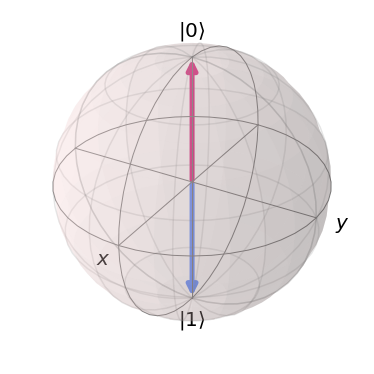

In [5]:
from qiskit.visualization import plot_bloch_vector
points = [[0,0,1],[0,0,-1]]
plot_bloch_vector(points)



#### Exemplo básico

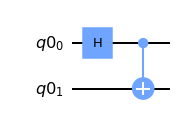

In [3]:
qr = QuantumRegister(2); 
qc = qiskit.QuantumCircuit(qr);


### Preparo o sistema no estado |+>
qc.h(qr[0]);

### Aplico o circuito para medidas não-reveladas
qc.cx(qr[0],qr[1]);

qc.draw(output='mpl')

In [5]:
### Tomografia do qubit 0
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
qstc = state_tomography_circuits(qc,qr[0]);
job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=8192)
qstf = StateTomographyFitter(job.result(), qstc)
rho = qstf.fit(method='lstsq')
rho

array([[5.15502930e-01+0.j        , 2.44140625e-04+0.01220703j],
       [2.44140625e-04-0.01220703j, 4.84497070e-01+0.j        ]])

### Implementação de $\Phi_{\mathcal{Y}}(\rho)$ onde $\mathcal{Y}$ é um observável cujos autovetores são $|n_0\rangle, |n_1\rangle$:


#### Por exemplo, o observável $\hat{n} \cdot \vec{\sigma}$

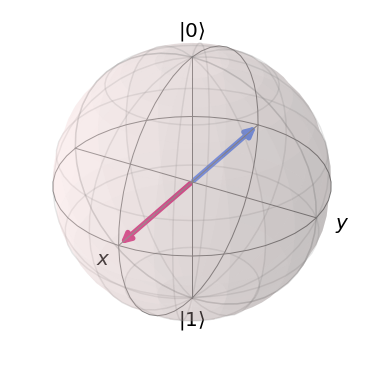

In [8]:
from qiskit.visualization import plot_bloch_vector
points = [[1,0,0],[-1,0,0]]
plot_bloch_vector(points)

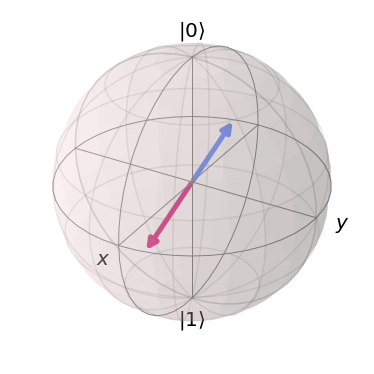

In [28]:
import numpy as np

points = []
for k in [0, 1]:
    r = 1
    th = math.pi/2; ph = 0.2+k*np.pi; 
    x = r*math.sin(th)*math.cos(ph); y = r*math.sin(th)*math.sin(ph); z = r*math.cos(th)
    points.append([x,y,z])
plot_bloch_vector(points)



A seguir, vamos considerar a seguinte base para descrever o estado de um qubit:
\begin{align}
|n_{0}\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle = U|0\rangle, \\
|n_{1}\rangle = -\sin(\theta/2)|0\rangle + e^{i\phi}\cos(\theta/2)|1\rangle = U|1\rangle,
\end{align}
com
\begin{equation}
U_{c\rightarrow g} = \begin{bmatrix} \cos(\theta/2) & -\sin(\theta/2) \\ e^{i\phi}\sin(\theta/2) & e^{i\phi}\cos(\theta/2) \end{bmatrix} \ \therefore\  U_{c\rightarrow g}^{\dagger} = \begin{bmatrix} \cos(\theta/2) & e^{-i\phi}\sin(\theta/2) \\ -\sin(\theta/2) & e^{-i\phi}\cos(\theta/2) \end{bmatrix}.
\end{equation}

As medidas não-reveladas de um observável qualquer $\mathcal{Y} = \hat{n}\cdot\vec{\sigma}$:
\begin{align}
\Phi_{\mathcal{Y}}(\rho_{\psi}) &= \Pi^{\mathcal{Y}}_{n_0}|\psi\rangle\langle\psi|\Pi^{\mathcal{Y}}_{n_0}  + \Pi^{\mathcal{Y}}_{n_1}|\psi\rangle\langle\psi|\Pi^{\mathcal{Y}}_{n_1} \\ 
&= |n_{0}\rangle\langle n_{0}||\psi\rangle\langle\psi||n_{0}\rangle\langle n_{0}|  + |n_{1}\rangle\langle n_{1}||\psi\rangle\langle\psi||n_{1}\rangle\langle n_{1}| \\
&= U|0\rangle\langle 0|U^{\dagger}|\psi\rangle\langle\psi|U|0\rangle\langle 0|U^{\dagger}  + U|1\rangle\langle 1|U^{\dagger}|\psi\rangle\langle\psi|U|1\rangle\langle 1|U^{\dagger} \\
&= U\big(|0\rangle\langle 0||\psi'\rangle\langle\psi'||0\rangle\langle 0|  + |1\rangle\langle 1||\psi'\rangle\langle\psi'||1\rangle\langle 1|\big)U^{\dagger} \\
&= U\Phi_{\mathcal{X}}(\rho_{\psi'})U^{\dagger},
\end{align}
onde $$|\psi'\rangle:=U^{\dagger}|\psi\rangle.$$ Portanto, uma medida não-revelada de um observável qualquer pode ser implementada usando o seguinte circuito quântico:


<img src='fig_measure_sim.png' width='400'>

Além disso, a transformação unitária que liga as duas bases pode ser implementada pela seguinte porta lógica:
$$U(\theta,\phi,\lambda)=\begin{bmatrix}\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\ e^{i\phi}\sin(\theta/2) & e^{i(\phi+\lambda)}\cos(\theta/2) \end{bmatrix}, \ \ \ \ U^{\dagger}(\theta,\phi,\lambda)=\begin{bmatrix}\cos(\theta/2) & e^{-i\phi}\sin(\theta/2) \\ -e^{-i\lambda}\sin(\theta/2) & e^{-i(\phi+\lambda)}\cos(\theta/2) \end{bmatrix} = U(\theta,\pi-\lambda,-\pi-\phi)$$




#### Exemplo: Medidas não reveladas na base $|+\rangle, |-\rangle$


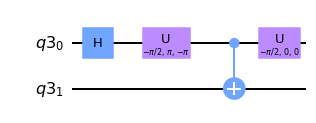

In [10]:
import math 

qr = QuantumRegister(2); 
qc = qiskit.QuantumCircuit(qr);


### preparo o sistema no estado |+> por exemplo
qc.h(qr[0]);

### medidas não reveladas do observável Y cujos autovetores é |+>, |->
qc.u(-math.pi/2, math.pi, -math.pi, qr[0])
qc.cx(qr[0],qr[1]);
qc.u(-math.pi/2, 0, 0, qr[0])

qc.draw(output='mpl')


In [11]:
### Tomografia do qubit 0
qstc = state_tomography_circuits(qc,qr[0]);
job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=8192)
qstf = StateTomographyFitter(job.result(), qstc)
rho = qstf.fit(method='lstsq')
rho

array([[0.49731454+0.j        , 0.49998421+0.00292959j],
       [0.49998421-0.00292959j, 0.50268546+0.j        ]])

#### Note que, no entanto, a máquina nos retorna o operador densidade do sistema na base $|0\rangle, |1\rangle$. Cabe a nós interpretar o resultado corretamente !

### Aplicação: Medidas não-reveladas e Complementariedade

Consideremos as seguintes funções: 
$$P_{vn}^{X}(\rho) = \log_{2}(d)-S_{vn}(\Phi_{X}(\rho)),$$

$$C_{re}^{X}(\rho) = S_{vn}(\Phi_{X}(\rho))-S_{vn}(\rho).$$

e também a Coerência dos observável $Y$ codificada no estado $\Phi_X(\rho)$:
$$C_{re}^{Y}(\Phi_{X}(\rho)) = S_{vn}(\Phi_{Y}\Phi_{X}(\rho))-S_{vn}(\Phi_{X}(\rho)).$$

Brincando com a relação acima podemos mostrar que
\begin{align}
    C^Y_{re}(\Phi_X(\rho_A)) & = S_{vn}(\Phi_{YX}(\rho_A)) - S_{vn}(\Phi_{X}(\rho_A)) \\
   & = P^X_{vn}(\rho_A) - P^Y_{vn}(\Phi_X(\rho_A))\\
   & \le P^X_{vn}(\rho_A).
   \label{eq:CPineq}
\end{align}
Ou seja, a quantidade coerência com referência a um observável $Y$ codificada no estado $\Phi_X(\rho_A)$ é controlada pela previsibilidade do observável $X$ antes de fazer medidas não reveladas. A equação acima ainda pode ser reescrita como
\begin{align}
    C^Y_{re}(\Phi_X(\rho_A)) +  P^Y_{vn}(\Phi_X(\rho_A)) =  P^X_{vn}(\rho_A),
\end{align}
ou seja, a relação de complementariedade com respeito ao observável $Y$ do estado $\Phi_X(\rho_A)$ é controlada pela previsibilidade em relação ao observável $X$ antes de fazer medidas não-seletivas no estado $\rho_A$. Se $X, Y$ são observáveis maximamente incompatíveis, temos a seguinte igualdade:
\begin{align}
    C^Y_{re}(\Phi_X(\rho_A)) =  P^X_{vn}(\rho_A).
\end{align}





In [17]:
def n_basis(th, ph, typ): # general one-qubit basis
    if typ == 's': # for symbols
        ket_n0 = Matrix([[cos(th/2)],[(cos(ph)+1j*sin(ph))*sin(th/2)]])
        bra_n0 = Matrix([[cos(th/2),(cos(ph)-1j*sin(ph))*sin(th/2)]])
        ket_n1 = Matrix([[-sin(th/2)],[(cos(ph)+1j*sin(ph))*cos(th/2)]])
        bra_n1 = Matrix([[-sin(th/2),(cos(ph)-1j*sin(ph))*cos(th/2)]])
    elif typ == 'n': # for numbers
        ket_n0 = np.array([[math.cos(th/2)],[(math.cos(ph)+1j*math.sin(ph))*math.sin(th/2)]])
        bra_n0 = np.array([[math.cos(th/2),(math.cos(ph)-1j*math.sin(ph))*math.sin(th/2)]])
        ket_n1 = np.array([[-math.sin(th/2)],[(math.cos(ph)+1j*math.sin(ph))*math.cos(th/2)]])
        bra_n1 = np.array([[-math.sin(th/2),(math.cos(ph)-1j*math.sin(ph))*math.cos(th/2)]])
    return ket_n0, bra_n0, ket_n1, bra_n1


In [18]:
typ = 's' # choose to use symbols (s) or numbers (any other symbol)
if typ == 's':
    th, ph = symbols('theta phi'); ket_n0, bra_n0, ket_n1, bra_n1 = n_basis(th, ph, typ)
elif typ == 'n':
    th = math.pi/4; ph = 0; ket_n0, bra_n0, ket_n1, bra_n1 = n_basis(th, ph, typ)
ket_n0, bra_n0, ket_n1, bra_n1

⎛⎡               ⎛θ⎞            ⎤                                         ⎡   
⎜⎢            cos⎜─⎟            ⎥                                         ⎢   
⎜⎢               ⎝2⎠            ⎥  ⎡   ⎛θ⎞                          ⎛θ⎞⎤  ⎢   
⎜⎢                              ⎥, ⎢cos⎜─⎟  (-ⅈ⋅sin(φ) + cos(φ))⋅sin⎜─⎟⎥, ⎢   
⎜⎢                           ⎛θ⎞⎥  ⎣   ⎝2⎠                          ⎝2⎠⎦  ⎢   
⎜⎢(1.0⋅ⅈ⋅sin(φ) + cos(φ))⋅sin⎜─⎟⎥                                         ⎢(1.
⎝⎣                           ⎝2⎠⎦                                         ⎣   

            ⎛θ⎞            ⎤                                        ⎞
        -sin⎜─⎟            ⎥                                        ⎟
            ⎝2⎠            ⎥  ⎡    ⎛θ⎞                          ⎛θ⎞⎤⎟
                           ⎥, ⎢-sin⎜─⎟  (-ⅈ⋅sin(φ) + cos(φ))⋅cos⎜─⎟⎥⎟
                        ⎛θ⎞⎥  ⎣    ⎝2⎠                          ⎝2⎠⎦⎟
0⋅ⅈ⋅sin(φ) + cos(φ))⋅cos⎜─⎟⎥                                        ⎟
                        ⎝2

In [19]:
def rho_basis_n(th, ph, rho, typ): # representation of rho in a given basis
    ket_n0, bra_n0, ket_n1, bra_n1 = n_basis(th, ph, typ)
    if typ == 's':
        rhon = Matrix([[bra_n0*rho*ket_n0, bra_n0*rho*ket_n1],[bra_n1*rho*ket_n0, bra_n1*rho*ket_n1]])
    elif typ == 'n':
        rho00 = bra_n0.dot(rho.dot(ket_n0)); rho01 = bra_n0.dot(rho.dot(ket_n1))
        rho10 = bra_n1.dot(rho.dot(ket_n0)); rho11 = bra_n1.dot(rho.dot(ket_n1))
        rhon = np.array([[rho00.item(), rho01.item()],[rho10.item(), rho11.item()]])
    return rhon

In [20]:
typ = 'n'
if typ == 's':
    th, ph = symbols('theta phi'); rho00,rho01,rho10,rho11 = symbols('r_{00} r_{01} r_{10} r_{11}') 
    rho = Matrix([[rho00,rho01],[rho10,rho11]]); rhon = rho_basis_n(th, ph, rho, typ)
elif typ == 'n':
    th = -math.pi/2; ph = 0; rho00,rho01,rho10,rho11 = 1,0,0,0
    rho = np.array([[rho00,rho01],[rho10,rho11]]); rhon = rho_basis_n(th, ph, rho, typ)
rhon

array([[0.5+0.j, 0.5+0.j],
       [0.5+0.j, 0.5+0.j]])

### Preditibilidade

In [21]:
def predictability_vn(rho, th, ph): # th,ph define the reference basis
    d = rho.shape[0]; 
    # matrix rep. of rho in the basis def. by (th,ph)
    rhon = rho_basis_n(th, ph, rho, 'n');# print('rhon = ',rhon)
    pv = np.zeros(d); 
    for j in range(0,d):
        pv[j] = rhon[j,j].real
    return log(d, 2) - shannon_num(pv)

### Coerência

In [22]:
def coherence_re(rho, th, ph): # th,ph defines the reference basis
    d = rho.shape[0]; pv = np.zeros(d)
    # matrix representation of rho in the basis defined by (th,ph)
    rhon = rho_basis_n(th, ph, rho, 'n'); #print(rhon)
    for j in range(0, d):
        pv[j] = rhon[j,j].real
    # we use the same state to compute S_vn because of its basis invariance
    return shannon_num(pv) - von_neumann_num(rho)

In [23]:
from qiskit import IBMQ

In [24]:
IBMQ.save_account('407eee087e66afb971221353c2214710f90034665067ef91fefb09e98c6c99d94ff4f4f1c14131a196c09a5d24a4368e1aaa03b0f3d99578f0b8f47071995da6', overwrite = True)

In [9]:
qiskit.IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [10]:
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')

In [11]:
from qiskit.tools.monitor import backend_overview, backend_monitor

In [12]:
backend_overview()

ibmq_manila                  ibmq_quito                   ibmq_belem
-----------                  ----------                   ----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 13             Pending Jobs: 15             Pending Jobs: 32
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      136.8          Avg. T1:      84.0           Avg. T1:      74.8
Avg. T2:      49.5           Avg. T2:      108.2          Avg. T2:      90.5



ibmq_lima                    ibmq_bogota                  ibmq_santiago
---------                    -----------                  -------------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 21             Pending Jobs: 12             Pending Jobs: 1978
Least busy:   False          Least busy:   True           Least busy:   False
Operational:  True          

In [13]:
device = provider.get_backend('ibmq_belem')

from qiskit.tools.monitor import job_monitor
qr = QuantumRegister(2)
qc = qiskit.QuantumCircuit(qr); 
qc_cal = qiskit.QuantumCircuit(qr)
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)
cal_circuits, state_labels = complete_meas_cal(qr = qc.qregs[0], circlabel = 'mmc')
cal_job = execute(cal_circuits, backend = device, shots = 8192, optimization_level = 0)
print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()
meas_fitter = CompleteMeasFitter(cal_results, state_labels)
meas_filter = meas_fitter.filter

61ab490baad5f3c44d9db99f
Job Status: job has successfully run


In [103]:
backend_monitor(device)

ibmq_belem
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 11
    backend_version: 1.0.29
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    u_channel_lo: [[{'q': 1, 'scale': (1+0j)}], [{'q': 0, 'scale': (1+0j)}], [{'q': 2, 'scale': (1+0j)}], [{'q': 3, 'scale': (1+0j)}], [{'q': 1, 'scale': (1+0j)}], [{'q': 1, 'scale': (1+0j)}], [{'q': 4, 'scale': (1+0j)}], [{'q': 3, 'scale': (1+0j)}]]
    online_date: 2021-01-08 05:00:00+00:00
    dt: 0.2222222222222222
    n_registers: 1
    meas_kernels: ['hw_boxcar']
    conditional_latency: []
    processor_type: {'family': 'Falcon', 'revision': 4, 'segment': 'T'}
    backend_name: ibmq_belem
    allow_object_storage: True
    url: None
    meas_lo_range: [[6.801661824000001, 7.801661824000001], [6.8934333720000005, 7.8934333720000005], [6.860214726000001, 7.860214726000001], [6.8033823270000005, 7.8033823270000005], [6.926310916, 7.926310916]]

#### Testaremos relações para o seguinte estado $|\psi\rangle = \cos(\theta/2)|0\rangle+\sin(\theta/2)|1\rangle \text{ for } \theta\in[0,-\pi/2]$

In [11]:
#device = provider.get_backend('ibmq_manila')

qr = QuantumRegister(2); 
qc = qiskit.QuantumCircuit(qr);

th2, ph2, lb2 = 0, 0, 0
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter

#qst_qc1 = state_tomography_circuits(qc, [qr[0],qr[1]]);
#job_sim1 = qiskit.execute(qst_qc1, backend = simulator, shots = 8192)


th_min = 0; th_max = math.pi/2; N = 10; dth = (th_max-th_min)/N; th = -dth + 10**-1; thv = np.zeros(N+1)

PvX = np.zeros(N+1)
Cv = np.zeros(N+1)
Pv = np.zeros(N+1)

for j in range(0, N+1):
    qr = QuantumRegister(2)
    qc = qiskit.QuantumCircuit(qr)
    th += dth
    thv[j] = th 
    
    # State preparation
    th1 = th; ph1 = 0; lb1 = 0 # angles for the state preparation
    qc.u(th1, ph1, lb1, qr[0]); #print('prep = ',th1, ph1, lb1)
    # qstate tomography for rho
    qst_qc1 = state_tomography_circuits(qc, [qr[0],qr[1]]); # defines the qcircuit to make qst
    # simulator
    job_sim1 = qiskit.execute(qst_qc1, Aer.get_backend('qasm_simulator'), shots = 8192); # executes the qst
    qstf_qc_sim1 = StateTomographyFitter(job_sim1.result(), qst_qc1); # fits the data to extract rho
    rho10_prep_sim = qstf_qc_sim1.fit(method = 'lstsq');
    rho0_prep_sim = pTraceL_num(2, 2, rho10_prep_sim)
    
    PvX[j] = predictability_vn(rho0_prep_sim, th2, ph2)
    
    qc.cx(qr[0], qr[1]); #print('meas = ',th2, ph2, lb2)
    
    
    # qstate tomography for Pi(rho)
    qst_qc = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
    job = qiskit.execute(qst_qc, Aer.get_backend('qasm_simulator'), shots = 8192) # executes the qst
    qstf_qc = StateTomographyFitter(job.result(), qst_qc) # fits the data to extract rho
    rho10_meas = qstf_qc.fit(method='lstsq'); 
    rho0_meas = pTraceL_num(2, 2, rho10_meas); #print('Pi(rho) = ', rho0_meas)
    
    
    Cv[j] = coherence_re(rho0_meas, math.pi/3, 0) # C with reference to sigma_x
    Pv[j] = predictability_vn(rho0_meas, math.pi/3,0)

    


/home/marcos/anaconda3/lib/python3.7/site-packages/qiskit/ignis/verification/tomography/basis/circuits.py:468: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  prep += circuit
/home/marcos/anaconda3/lib/python3.7/site-packages/qiskit/circuit/quantumcircuit.py:942: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)
/home/marcos/anaconda3/lib/python3.7/site-packages/qiskit/ignis/verification/tomography/basis/circuits.py:478: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circ = prep + meas
/home/marcos/ana

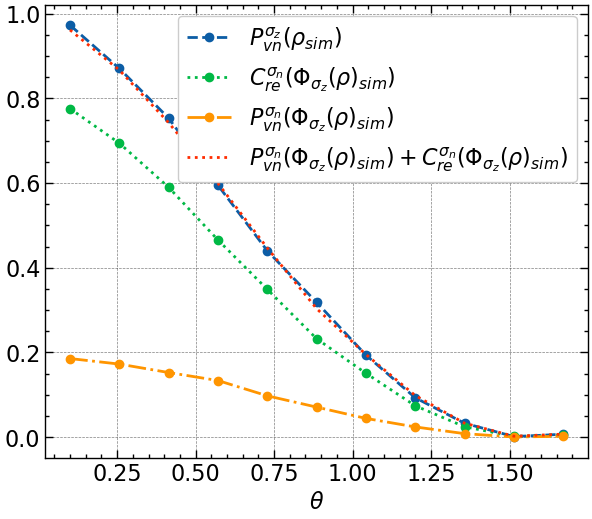

In [12]:
import matplotlib
plt.style.use(['science', 'notebook', 'grid'])    
    
    
matplotlib.rcParams.update({'font.size':10}); plt.figure(figsize = (7,6), dpi = 100)
plt.plot(thv, PvX, 'o--',label = r'$P_{vn}^{\sigma_{z}}(\rho_{sim})$')
plt.plot(thv, Cv, 'o:', label = r'$C_{re}^{\sigma_{n}}(\Phi_{\sigma_{z}}(\rho)_{sim})$')
plt.plot(thv, Pv, 'o-.', label = r'$P_{vn}^{\sigma_{n}}(\Phi_{\sigma_{z}}(\rho)_{sim})$')
plt.plot(thv, Pv + Cv, ':', label = r'$P_{vn}^{\sigma_{n}}(\Phi_{\sigma_{z}}(\rho)_{sim})+ C_{re}^{\sigma_{n}}(\Phi_{\sigma_{z}}(\rho)_{sim})$')

plt.xlabel(r'$\theta$'); 
    #plt.legend(loc = 'center right', bbox_to_anchor=(th_max-0.05, 0.5))
plt.legend(loc = 'best')
    #plt.savefig(path+'psi_plot1.png', format = 'png', dpi = 200)
plt.show()

In [19]:
#device = provider.get_backend('ibmq_manila')

qr = QuantumRegister(2); 
qc = qiskit.QuantumCircuit(qr);

th2, ph2, lb2 = 0, 0, 0
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


th_min = 0; th_max = math.pi/2; N = 10; dth = (th_max-th_min)/N; th = -dth + 10**-1; thv = np.zeros(N+1)

#PvX = np.zeros(N+1)
#Cv = np.zeros(N+1)
#Pv = np.zeros(N+1)

PvXE = np.zeros(N+1)
CvE = np.zeros(N+1)
PvE = np.zeros(N+1)



for j in range(0, N+1):
    qr = QuantumRegister(2)
    qc = qiskit.QuantumCircuit(qr)
    th += dth
    thv[j] = th 
    
    # State preparation
    th1 = th; ph1 = 0; lb1 = 0 # angles for the state preparation
    qc.u(th1, ph1, lb1, qr[0]); #print('prep = ',th1, ph1, lb1)
    # qstate tomography for rho
    qst_qc1 = state_tomography_circuits(qc, [qr[0],qr[1]]); # defines the qcircuit to make qst
    
    job_dev1 = qiskit.execute(qst_qc1, backend = device, shots = 8192); # executes the qst
    print(job_dev1.job_id());
    job_monitor(job_dev1);
    job_dev_mit1 = meas_filter.apply(job_dev1.result(), method='least_squares'); # error mitigation
    qstf_qc_dev1 = StateTomographyFitter(job_dev_mit1, qst_qc1); # fits the data to extract rho
    rho10_prepE = qstf_qc_dev1.fit(method = 'lstsq');
    rho0_prepE = pTraceL_num(2, 2, rho10_prepE)
    
    PvXE[j] = predictability_vn(rho0_prepE, th2, ph2)  



    qc.cx(qr[0], qr[1]); #print('meas = ',th2, ph2, lb2)
    
    
    # qstate tomography for Pi(rho)
    qst_qc = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst


    job_dev2 = qiskit.execute(qst_qc, backend = device, shots = 8192); # executes the qst
    print(job_dev2.job_id());
    job_monitor(job_dev2);
    job_dev_mit2 = meas_filter.apply(job_dev2.result(), method='least_squares'); # error mitigation
    qstf_qc_dev2 = StateTomographyFitter(job_dev_mit2, qst_qc); # fits the data to extract rho
    rho10_measE = qstf_qc_dev2.fit(method = 'lstsq');
    rho0_measE = pTraceL_num(2, 2, rho10_measE)
    
    CvE[j] = coherence_re(rho0_measE, math.pi/3, 0)
    PvE[j] = predictability_vn(rho0_measE, math.pi/3, 0)



61867855286a505e94f41eca
Job Status: job has successfully run
61867889973ff7999f7c4e40
Job Status: job has successfully run
618678adad308a81f18759bb
Job Status: job has successfully run
618678d2286a50c4a0f41ecc
Job Status: job has successfully run
618678fdd4dd981e9c58598b
Job Status: job has successfully run
61867921d4dd98555558598d
Job Status: job has successfully run
618679448a135119552ad620
Job Status: job has successfully run
6186796d9b38ae81f7b848b4
Job Status: job has successfully run
61867993ad308a38378759c2
Job Status: job has successfully run
618679b29b38ae4930b848b7
Job Status: job has successfully run
618679d9286a50ee45f41ed1
Job Status: job has successfully run
61867a01dbd9314ceee988f0
Job Status: job has successfully run
61867a30f6ecb346c28cd135
Job Status: job has successfully run
61867a64973ff779d77c4e48
Job Status: job has successfully run
61867a89d4dd98a30f585993
Job Status: job has successfully run
61867aaf973ff7fde87c4e4b
Job Status: job has successfully run
61867ad3

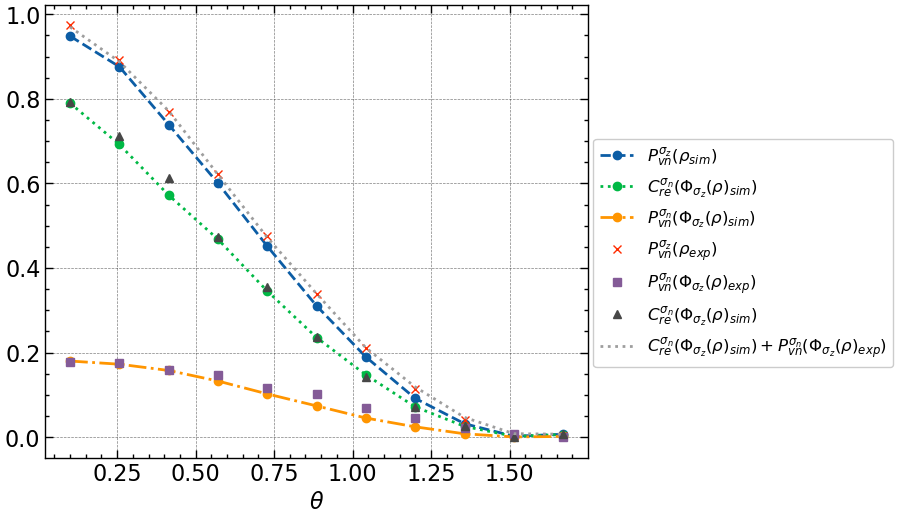

In [24]:
import matplotlib
plt.style.use(['science', 'notebook', 'grid'])    
    
    
matplotlib.rcParams.update({'font.size':10}); plt.figure(figsize = (7,6), dpi = 100)
plt.plot(thv, PvX, 'o--',label = r'$P_{vn}^{\sigma_{z}}(\rho_{sim})$')
plt.plot(thv, Cv, 'o:', label = r'$C_{re}^{\sigma_{n}}(\Phi_{\sigma_{z}}(\rho)_{sim})$')
plt.plot(thv, Pv, 'o-.', label = r'$P_{vn}^{\sigma_{n}}(\Phi_{\sigma_{z}}(\rho)_{sim})$')
plt.plot(thv, PvXE, 'x', label = r'$P_{vn}^{\sigma_{z}}(\rho_{exp})$')
plt.plot(thv, PvE, 's', label = r'$P_{vn}^{\sigma_{n}}(\Phi_{\sigma_{z}}(\rho)_{exp})$')
plt.plot(thv, CvE, '^', label = r'$C_{re}^{\sigma_{n}}(\Phi_{\sigma_{z}}(\rho)_{sim})$')
plt.plot(thv, CvE + PvE, ':',  label = r'$C_{re}^{\sigma_{n}}(\Phi_{\sigma_{z}}(\rho)_{sim}) + P_{vn}^{\sigma_{n}}(\Phi_{\sigma_{z}}(\rho)_{exp})$')

plt.xlabel(r'$\theta$'); 
    #plt.legend(loc = 'center right', bbox_to_anchor=(th_max-0.05, 0.5))
plt.legend(fontsize=12, loc=(1.01,0.2) )
    #plt.savefig(path+'psi_plot1.png', format = 'png', dpi = 200)
plt.show()

### Two times complementarity relation

A partir das relações de incertezas entrópicas
\begin{align}
    H_X(\rho_A) + H_Y(\rho_A) \ge \log_2 \frac{1}{c}, \label{eq:unc}
\end{align}
onde $H_X(\rho_A) = - \sum_j p_j(X, \rho_A) \log_2 p_j(X, \rho_A)$, com $p_j(X, \rho_A) = Tr (X_j \rho_A)$, é a entropia de Shannon do observável $X$ dado o estado $\rho_A$. Enquanto isso, $c = \max_{j,k} |{\langle x_j | y_k \rangle}|^2$. E também, levando em conta que $C^Y_{re}(\Phi_X(\rho_A)) \le P^X_{vn}(\rho_A)$ 

\begin{align}
 P^Y_{vn}(\rho_A) + C^Y_{re}(\Phi_X(\rho_A)) \le  P^Y_{vn}(\rho_A) +  P^X_{vn}(\rho_A) \le 2 \log_2 d_A + \log_2 c \le 2 \log_2 d_A, 
\end{align}
onde $c = \max_{j,k} |\langle x_j | y_k \rangle |^2$. 


Se $X,Y$ são observáveis maximamente incompatíveis, temos que
\begin{align}
P^Y_{vn}(\rho_A) + C^Y_{re}(\Phi_X(\rho_A)) \le \log_2 d_A. 
\end{align}


Agora, para um qubit e considerando as bases $|0\rangle, |1\rangle$ e $|n_0\rangle, |n_1\rangle$, temos que
\begin{align}
& c = max_{jk}|\langle n_j | k \rangle|^2 = \cos^2 \frac{\theta}{2}, \ \ \ \ \theta \in [0,\pi/2)\\
& c = max_{jk}|\langle n_j | k \rangle|^2 = \sin^2 \frac{\theta}{2}, \ \ \ \ \theta \in (\pi/2,\pi],
\end{align}
de modo que, para $\theta \in [0,\pi/2)$, temos
\begin{align}
 P^Y_{vn}(\rho_A) + C^Y_{re}(\Phi_X(\rho_A)) \le 2\Big(1 + \log_2 \cos \frac{\theta}{2}\Big) \le 2.
\end{align}

In [15]:
#device = provider.get_backend('ibmq_manila')
import numpy as np

qr = QuantumRegister(2); 
qc = qiskit.QuantumCircuit(qr);

th2, ph2, lb2 = 0, 0, 0
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


th_min = 0; th_max = math.pi/2; N = 10; dth = (th_max-th_min)/N; th = -dth + 10**-1; thv = np.zeros(N+1)

Pv = np.zeros(N+1)
Cv = np.zeros(N+1)


for j in range(0, N+1):
    qr = QuantumRegister(2)
    qc = qiskit.QuantumCircuit(qr)
    th += dth
    thv[j] = th 
    
    # State preparation
    th1 = th; ph1 = 0; lb1 = 0 # angles for the state preparation
    qc.u(th1, ph1, lb1, qr[0]); #print('prep = ',th1, ph1, lb1)
    # qstate tomography for rho
    qst_qc1 = state_tomography_circuits(qc, [qr[0],qr[1]]); # defines the qcircuit to make qst
    # simulator
    job_sim1 = qiskit.execute(qst_qc1, Aer.get_backend('qasm_simulator'), shots = 8192); # executes the qst
    qstf_qc_sim1 = StateTomographyFitter(job_sim1.result(), qst_qc1); # fits the data to extract rho
    rho10_prep_sim = qstf_qc_sim1.fit(method = 'lstsq');
    rho0_prep_sim = pTraceL_num(2, 2, rho10_prep_sim)
    
    Pv[j] = predictability_vn(rho0_prep_sim, -pi/2, 0)
    

    
    qc.cx(qr[0], qr[1]); #print('meas = ',th2, ph2, lb2)
    # qstate tomography for Pi(rho)
    qst_qc = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
    job = qiskit.execute(qst_qc, Aer.get_backend('qasm_simulator'), shots = 8192) # executes the qst
    qstf_qc = StateTomographyFitter(job.result(), qst_qc) # fits the data to extract rho
    rho10_meas = qstf_qc.fit(method='lstsq'); 
    rho0_meas = pTraceL_num(2, 2, rho10_meas); #print('Pi(rho) = ', rho0_meas)
    
    Cv[j] = coherence_re(rho0_meas, -pi/2, 0) # C with reference to sigma_x



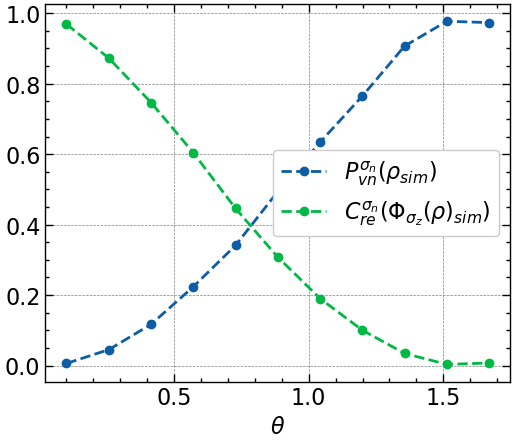

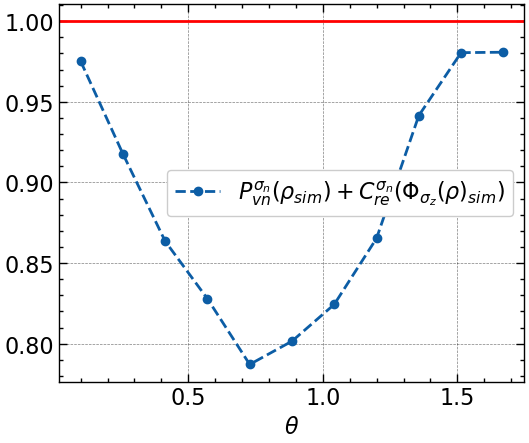

In [16]:
import matplotlib
plt.style.use(['science', 'notebook', 'grid'])    
    
theta = np.pi/2
f = 2*(1 + np.log2(np.cos(theta/2)))
#g = 2*(1 + np.log2(np.sin(theta/2)))

matplotlib.rcParams.update({'font.size':10}); plt.figure(figsize = (6,5), dpi = 100)
plt.plot(thv, Pv, 'o--',label = r'$P_{vn}^{\sigma_{n}}(\rho_{sim})$')
plt.plot(thv, Cv, 'o--', label = r'$C_{re}^{\sigma_{n}}(\Phi_{\sigma_{z}}(\rho)_{sim})$')

plt.xlabel(r'$\theta$'); 
    #plt.legend(loc = 'center right', bbox_to_anchor=(th_max-0.05, 0.5))
plt.legend(loc = 'best')
    #plt.savefig(path+'psi_plot1.png', format = 'png', dpi = 200)
plt.show()


import matplotlib
plt.style.use(['science', 'notebook', 'grid'])    
    
    
matplotlib.rcParams.update({'font.size':10}); plt.figure(figsize = (6,5), dpi = 100)
plt.plot(thv, Pv + Cv, 'o--',label = r'$P_{vn}^{\sigma_{n}}(\rho_{sim}) + C_{re}^{\sigma_{n}}(\Phi_{\sigma_{z}}(\rho)_{sim})$')
plt.axhline(y=f, color='r', linestyle='-')

plt.xlabel(r'$\theta$'); 
    #plt.legend(loc = 'center right', bbox_to_anchor=(th_max-0.05, 0.5))
plt.legend(loc = 'best')
    #plt.savefig(path+'psi_plot1.png', format = 'png', dpi = 200)
plt.show()

### Weak non-revealed measurements

Medidas fracas não-reveladas são mapas do tipo
\begin{align}
\Phi^{\epsilon}_{X}(\rho) = \epsilon \rho + (1 - \epsilon) \Phi_X (\rho),
\end{align}
com $\epsilon \in [0,1]$

#### Circuito para medidas não-reveladas fracas na base $|0\rangle, |1\rangle$

Dado o estado quântico bipartido inicial
\begin{equation}
|\Psi \rangle_{AB} = |\psi\rangle_A \otimes |\phi\rangle_B =  |\psi\rangle_A \otimes \Big(\cos\frac{\theta}{2} |0 \rangle_B + \sin \frac{\theta}{2} |1 \rangle_B\Big), 
\end{equation}
onde $|\phi\rangle_B$ pode ser obtido a partir de $|\phi\rangle_B = U(\theta) |0 \rangle_B$

Aplicando a porta $C_{not} (A \to B) := C(A \to B) = |0 \rangle \langle 0| \otimes I_{2 \times 2} + |1 \rangle \langle 1| \otimes \sigma_X$, temos o seguinte estado
\begin{equation}
C(A \to B)|\Psi \rangle_{AB} = \langle 0| \psi \rangle \Big( \cos\frac{\theta}{2} |0,0\rangle + \sin\frac{\theta}{2} |0,1\rangle \Big) + \langle 1| \psi \rangle \Big( \cos\frac{\theta}{2} |1,1\rangle + \sin\frac{\theta}{2} |1,0\rangle \Big). 
\end{equation}
Tomando o traço parcial sobre sistema $B$, temos
\begin{align}
Tr_B\Big(C(A \to B)|\Psi \rangle_{AB} \langle \Psi | C^{\dagger}(A \to B) \Big) & = |{ \langle 0| \psi \rangle}|^2 |0 \rangle \langle 0| + |{ \langle 1| \psi \rangle}|^2 |1 \rangle \langle 1| + \cos\frac{\theta}{2}\sin\frac{\theta}{2}\langle 0| \psi \rangle \langle \psi| 1 \rangle |0 \rangle \langle 1| + t.c.,
\end{align}
mas notando que
\begin{align}
&\langle 0| \psi \rangle \langle \psi| 1 \rangle |0 \rangle \langle 1| = |0 \rangle \langle 0| \psi \rangle \langle \psi| 1 \rangle \langle 1| = |0 \rangle \langle 0| \psi \rangle \langle \psi| \Big( I_{2 \times 2} - |0 \rangle \langle 0| \Big), \\
& \langle 1| \psi \rangle \langle \psi| 0 \rangle |1 \rangle \langle 0| = |1 \rangle \langle 1| \psi \rangle \langle \psi| 0 \rangle \langle 0| = |1 \rangle \langle 1| \psi \rangle \langle \psi| \Big( I_{2 \times 2} - |1 \rangle \langle 1| \Big),
\end{align}
obtemos
\begin{align}
Tr_B\Big(C(A \to B)|\Psi \rangle_{AB} \langle \Psi | C^{\dagger}(A \to B) \Big) & = |{ \langle 0| \psi \rangle}|^2 |0 \rangle \langle 0| + |{ \langle 1| \psi \rangle}|^2 |1 \rangle \langle 1| +  \cos\frac{\theta}{2}\sin\frac{\theta}{2}|0 \rangle \langle 0| \psi \rangle \langle \psi| \Big( I_{2 \times 2} - |0 \rangle \langle 0| \Big)\\ 
& + \cos\frac{\theta}{2}\sin\frac{\theta}{2} |1 \rangle \langle 1| \psi \rangle \langle \psi| \Big( I_{2 \times 2} - |1 \rangle \langle 1| \Big) \\
& = (1 - \cos\frac{\theta}{2}\sin\frac{\theta}{2}) (|{ \langle 0| \psi \rangle}|^2 |0 \rangle \langle 0| + |{ \langle 1| \psi \rangle}|^2 |1 \rangle \langle 1|) + \cos\frac{\theta}{2}\sin\frac{\theta}{2}(|0 \rangle \langle 0| + |1 \rangle \langle 1| ) | \psi \rangle \langle \psi| \\
& = (1 - \cos\frac{\theta}{2}\sin\frac{\theta}{2}) \Phi_{X}(| \psi \rangle \langle \psi|) + \cos\frac{\theta}{2}\sin\frac{\theta}{2} | \psi \rangle \langle \psi|,
\end{align}
onde $ \Phi_{X}(| \psi \rangle \langle \psi|) = \Pi_0(|\psi \rangle \langle \psi| ) + \Pi_1(|\psi \rangle \langle \psi| )$  e $\epsilon := \cos\frac{\theta}{2}\sin\frac{\theta}{2} = \frac{1}{2}\sin \theta \in [0,1/2]$. Logo, temos que
\begin{align}
\Phi^{\epsilon}_X(| \psi \rangle \langle \psi|) = \epsilon | \psi \rangle \langle \psi| + (1 - \epsilon)\Phi_{X}(| \psi \rangle \langle \psi|) = Tr_B\Big(C(A \to B)|\Psi \rangle_{AB} \langle \Psi | C^{\dagger}(A \to B) \Big),
\end{align}
onde o observável $X$ é referente a base de autoestados $|0\rangle, |1\rangle$.

Então, 
\begin{align}
& \rho =  |+\rangle \langle + | = \frac{1}{2}\begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix}   \to \Phi_X(\rho_{\psi}) = \frac{1}{2}\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}\\ 
& \rho =  |+\rangle \langle + | = \frac{1}{2}\begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix} \to \Phi^{\epsilon}_{X}(\rho_{\psi}) = \epsilon |+\rangle \langle +| + (1 - \epsilon) \frac{I_{2 \times 2}}{2} = \frac{1}{2}\begin{bmatrix} 1 & \epsilon \\ \epsilon & 1 \end{bmatrix}
\end{align}

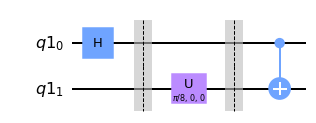

In [13]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)

qc.h(qr[0])

qc.barrier()

theta = np.pi/8
qc.u(theta, 0, 0, qr[1]) #valores aleatórios

qc.barrier()
qc.cx(qr[0],qr[1])

qc.draw(output = 'mpl')


In [14]:
### Tomografia do qubit 0
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
qstc = state_tomography_circuits(qc,qr[0]);
job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=8192)
qstf = StateTomographyFitter(job.result(), qstc)
rho = qstf.fit(method='lstsq')
rho

array([[0.50512695+0.j        , 0.18530273-0.00524902j],
       [0.18530273+0.00524902j, 0.49487305+0.j        ]])

#### Circuito para medidas não-reveladas fracas na base $|n_0\rangle, |n_1\rangle$

Agora, consideremos uma base numa direção arbitrária dada por
\begin{align}
& |n_0 \rangle = \cos\frac{\theta}{2} |0 \rangle + e^{i \phi} \sin \frac{\theta}{2} |1 \rangle = U(\theta, \phi, 0) |0 \rangle \\
& |n_1 \rangle = -\sin\frac{\theta}{2} |0 \rangle + e^{-i \phi} \cos \frac{\theta}{2} |1 \rangle = U(\theta, \phi, 0) |1 \rangle,
\end{align}
de modo que o procedimento é o mesmo das medidas não reveladas numa base qualquer:
\begin{align}
(U \otimes I_B) C(A \to B) (U^{\dagger} \otimes I_B) |\Psi\rangle & = (U \otimes I_B) \Big(|0\rangle \langle 0 | \otimes I_B + |1\rangle \langle 1 | \otimes \sigma^x_B \Big)(U^{\dagger} \otimes I_B) \Big(|\psi\rangle_A \otimes (\cos\frac{\theta}{2} |0 \rangle  + \sin\frac{\theta}{2} |1 \rangle)\Big) \\
& =  (U \otimes I_B)\Big( |0\rangle \langle 0 | U^{\dagger} |\psi_A \rangle \otimes (\cos\frac{\theta}{2} |0 \rangle  + \sin\frac{\theta}{2} |1 \rangle) + |1\rangle \langle 1 | U^{\dagger} |\psi_A \rangle \otimes \sigma^x_B (\cos\frac{\theta}{2} |0 \rangle  + \sin\frac{\theta}{2} |1 \rangle) \Big) \\
& = U \otimes I_B \Big(\langle n_0| \psi \rangle \Big( \cos\frac{\theta}{2} |0,0\rangle + \sin\frac{\theta}{2} |0,1\rangle \Big) + \langle n_1|\psi\rangle \Big( \cos\frac{\theta}{2} |1,1\rangle + \sin\frac{\theta}{2} |1,0\rangle \Big)\Big)\\
& = \langle n_0| \psi \rangle \Big( \cos\frac{\theta}{2} |n_0,0\rangle + \sin\frac{\theta}{2} |n_0,1\rangle \Big) + \langle n_1|\psi\rangle \Big( \cos\frac{\theta}{2} |n_1,1\rangle + \sin\frac{\theta}{2} |n_1,0\rangle \Big), 
\end{align}
bastando realizar a mesma manipulação que anteriormente. Logo, temos que medidas não reveladas do observável $Y$ referente à base de autovetores $|n_0 \rangle , |n_1 \rangle$ são implementadas através de
\begin{align}
\Phi^{\epsilon}_Y(\rho_A) = Tr_B \Big(UC(A\to B)U^{\dagger}|\Psi \rangle_{AB} \langle \Psi |  U C^{\dagger}(A\to B)U^{\dagger}\Big), 
\end{align}

com $\epsilon = \frac{1}{2} \sin \theta$.

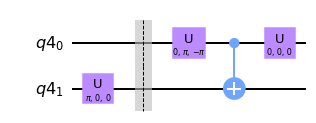

In [9]:
import numpy as np
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)

theta = np.pi
qc.u(theta, 0, 0, qr[1]) #valores aleatórios
qc.barrier()
qc.u(0, np.pi, -np.pi, qr[0]) #inversa de U
qc.cx(qr[0],qr[1])
qc.u(0, 0, 0, qr[0]) #valores aleatórios


qc.draw(output = 'mpl')

#### Estendendo $\epsilon \to [0,1]$ 
Ao invés de considerarmos a $C_{not}(A \to B)$, consideremos (como em Information-reality complementarity in photonic weak measurements, Phys. Rev. A 97, 062108 (2018))
\begin{equation}
C_Z (A \to B) = |0 \rangle \langle 0| \otimes I_{2 \times 2} + |1 \rangle \langle 1| \otimes \sigma_Z,
\end{equation}
de modo que
\begin{align}
Tr_B\Big(C_Z(A \to B)|\Psi \rangle_{AB} \langle \Psi | C_Z^{\dagger}(A \to B) \Big) & = \Big(1 - (\cos^2\frac{\theta}{2} - \sin^2\frac{\theta}{2})\Big) \Phi_{X}(| \psi \rangle \langle \psi|) + (\cos^2\frac{\theta}{2} - \sin^2\frac{\theta}{2})| \psi \rangle \langle \psi|,
\end{align}
definindo 
\begin{align}
\epsilon := \cos^2\frac{\theta}{2} - \sin^2\frac{\theta}{2} = \cos \theta,
\end{align}
temos que $\epsilon \in [0,1]$.

### Aplicação: reality of an observable
Em 1935, E.P.R. [Phys. Rev. 47, 777 (1935)] definiram pela primeira vez a noção de elementos de realidade:

##### definição: 
Se, sem pertubar o sistema, é possível prever com certeza igual à 1 o valor de um observável físico, então existe um elemento de realidade correspondente a esta quantidade física.

Assim, dado o protocolo discutido inicialmente para introduzir medidas não reveladas, comparemos as duas situação (a) e (b). Quando $\Phi_{\mathcal{O}}(\rho_{A}) = \rho_{A}$, a situação é tal que o elemento de realidade do observável $\mathcal{O}$ estava implícito na própria preparação de $\rho_A$. Nesse caso, as medidas não reveladas não criaram elemento de realidade (ou seja, tornaram o observável definido), mas apenas revelaram que o observável já estava definido anteriormente. Logo, Angelo e Bilobran em [Europhysics Letters 112, 40005 (2015)] sugeriram a seguinte definição:

##### definição:
Um observável  $\mathcal{O} = \sum_j o_j \Pi^{\mathcal{O}}_j$, com projetores $\Pi^{\mathcal{O}}_j = |o_j\rangle \langle o_j|$  possui elemento de realidade em relação à preparação $\rho_{A}$ se, e somente se,
\begin{align}
        \Phi_{\mathcal{O}}(\rho_{A}) = \rho_{A}.
\end{align}


Assim, podemos ver que o critério acima implementa a noção de realidade dada por EPR quando a preparação é um autoestado do observável $\mathcal{O}$, i.e., $\rho_A = \Pi^{\mathcal{O}}_j$ para algum $j$, como também prevê elemento de realidade para uma mistura de autoestados $\rho_A = \sum_j p_{o_j} \Pi^{\mathcal{O}}_j$. Além disso, tal critério automaticamente implementa a ideia de que uma medida preserva um elemento de realidade pré-existente em relação ao observável $\mathcal{O}$ uma vez que
\begin{align}
    \Phi_{\mathcal{O}}\Big(\Phi_{\mathcal{O}}(\rho_{A})\Big) = \Phi_{\mathcal{O}}(\rho_{A}).
\end{align}

A definição acima naturalmente sugere uma medida de quanto um dado estado $\rho_{A}$ está longe do estado no qual $\mathcal{O}$ é real (definido). Isto é, os autores definem uma medida de irrealidade (indefinição) do observável $\mathcal{O}$ dado a preparação $\rho_{A}$ como
\begin{align}
    \mathfrak{I}(\mathcal{O},\rho_{A}) := S(\Phi_{\mathcal{O}}(\rho_{A})) - S(\rho_{A}), 
\end{align}


Considerando um estado $|+ \rangle$ cuja coerência é máxima na base $0,1$ e medindo tal sistema
através de medidas fracas não reveladas de um observável cujo autoestado é $0,1$, temos que a variação da 'definição' (ou da realidade) desse observável $X$ é dada por
\begin{align}
\Delta \mathcal{R}^{\epsilon}_X & = - \Delta  \mathfrak{I}_X^{\epsilon}(\rho_{A}) = - \Big(\mathfrak{I}(X,\Phi^{\epsilon}_X(\rho_{A})) - \mathfrak{I}(X,\rho_{A}) \Big)\\
& = S_{vn}(\Phi^{\epsilon}_{X}(\rho_A)) - S_{vn}(\rho_A)
\end{align}





In [29]:
qr = QuantumRegister(2); 
qc = qiskit.QuantumCircuit(qr);

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


th_min = 0; th_max = math.pi/2; N = 10; dth = (th_max-th_min)/N; th = -dth + 10**-1; thv = np.zeros(N+1)
I = np.zeros(N+1) 
S = np.zeros(N+1) 
IE = np.zeros(N+1) 

for j in range(0, N+1):
    qr = QuantumRegister(2)
    qc = qiskit.QuantumCircuit(qr)
    th += dth
    thv[j] = th 
    
    # State preparation
    th1 = th; ph1 = 0; lb1 = 0 # angles for the state preparation
    
    qc.h(qr[0])
    
    qst_qc1 = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
    
    job_dev = qiskit.execute(qst_qc1, backend = device, shots = 8192); # executes the qst
    print(job_dev.job_id());
    job_monitor(job_dev);
    job_dev_mit = meas_filter.apply(job_dev.result(), method='least_squares'); # error mitigation
    qstf_qc_dev = StateTomographyFitter(job_dev_mit, qst_qc1); # fits the data to extract rho
    rho10_measE1 = qstf_qc_dev.fit(method = 'lstsq');
    rho0_measE1 = pTraceL_num(2, 2, rho10_measE1)
    
    S = von_neumann_num(rho0_measE1)
    
    qc.u(th1, ph1, lb1, qr[1]); #print('prep = ',th1, ph1, lb1)
    qc.cz(qr[0], qr[1]);
    
    #print('meas = ',th2, ph2, lb2)
    # qstate tomography for Pi(rho)
    qst_qc = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
    
    job = qiskit.execute(qst_qc, Aer.get_backend('qasm_simulator'), shots = 8192) # executes the qst
    qstf_qc = StateTomographyFitter(job.result(), qst_qc) # fits the data to extract rho
    rho10_meas = qstf_qc.fit(method='lstsq'); 
    rho0_meas = pTraceL_num(2, 2, rho10_meas); #print('Pi(rho) = ', rho0_meas)
    
    I[j] = von_neumann_num(rho0_meas) # C with reference to sigma_x
    
    job_dev1 = qiskit.execute(qst_qc, backend = device, shots = 8192); # executes the qst
    print(job_dev1.job_id());
    job_monitor(job_dev1);
    job_dev_mit1 = meas_filter.apply(job_dev1.result(), method='least_squares'); # error mitigation
    qstf_qc_dev1 = StateTomographyFitter(job_dev_mit1, qst_qc); # fits the data to extract rho
    rho10_measE = qstf_qc_dev1.fit(method = 'lstsq');
    rho0_measE = pTraceL_num(2, 2, rho10_measE)
    
    IE[j] = von_neumann_num(rho0_measE) - S
    
    

618682384ba99040d48fec34
Job Status: job has successfully run
618682598a135128ea2ad657
Job Status: job has successfully run
6186827aad308a4cf98759f6
Job Status: job has successfully run
618682a7973ff7a50a7c4e79
Job Status: job has successfully run
618682caad308a15f28759f8
Job Status: job has successfully run
618682e73d77ea3fa8f33cfa
Job Status: job has successfully run
618683079b38ae45afb848f3
Job Status: job has successfully run
618683278a13513a322ad65b
Job Status: job has successfully run
61868346f6ecb3e4488cd171
Job Status: job has successfully run
6186836a3d77eaf164f33cfd
Job Status: job has successfully run
6186838e973ff768dc7c4e80
Job Status: job has successfully run
618683c03d77ea2949f33cff
Job Status: job has successfully run
618683ea973ff7d9187c4e81
Job Status: job has successfully run
6186841b973ff752a77c4e82
Job Status: job has successfully run
6186843b973ff705ff7c4e83
Job Status: job has successfully run
6186845bf6ecb333da8cd17c
Job Status: job has successfully run
6186847b

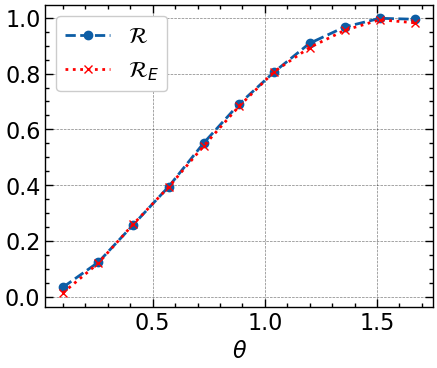

In [32]:
import matplotlib
plt.style.use(['science', 'notebook', 'grid'])    
    
    
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (5,4), dpi = 100)
#plt.plot(thv, Pv, 'o--',label = r'$P_{vn}^{\sigma_{z}}(\rho_{sim})$')
plt.plot(thv, I, 'o--', label = r'$\mathcal{R}$')
plt.plot(thv, IE, 'rx:', label = r'$\mathcal{R}_E$')

#plt.plot(thv, PvE, ':', label = r'$P_{vn}^{\sigma_{z}}(\rho_{exp})$')
plt.xlabel(r'$\theta$'); 
    #plt.legend(loc = 'center right', bbox_to_anchor=(th_max-0.05, 0.5))
plt.legend(loc = 'upper left')
    #plt.savefig(path+'psi_plot1.png', format = 'png', dpi = 200)
plt.show()

### Variation of reality for different observables

Seja $X$, $X'$ observáveis incompatíveis. Podemos nos perguntar como a 'realidade' do observável $X'$ varia quando o sistema quântico é monitorado pelo observável $X$ através do mapa $\Phi^{\epsilon}_X$. Por definição, a definição da realidade é dada por
\begin{align}
\Delta \mathcal{R}_{X'}(\rho)& = \mathcal{I}_{X'}(\rho) - \mathcal{I}_{X'}(\Phi^{\epsilon}_X(\rho)) \\
& = S(\Phi_{X'}(\rho)) + S(\Phi^{\epsilon}_X(\rho)) - S(\rho) - S(\Phi_{X'}(\Phi^{\epsilon}_X(\rho)))\\
& \ge 0,
\end{align}
ou seja, a realidade (definição) de um observável $X'$ sempre aumenta sob monitoramento de um observável qualquer $X$.

Agora, a seguinte pergunta é: o aumento da 'definição' de $X'$ pode ser maior que o aumento da definição $X$ sob monitoramente de $X$?

#### Surpreendentemente, sim. Há casos no qual $\Delta \mathcal{R}_{X'} \ge \Delta \mathcal{R}_{X}$ ####

Primeiro, vamos estabelecer alguns resultados esperados e outros interessantes. Notando que
\begin{align}
\Delta \mathcal{R}_X(\rho) = \Delta \mathcal{R}_{X'}(\rho) +  S(\Phi_{X'}(\Phi^{\epsilon}_X(\rho))) - S(\Phi_{X'}(\rho)).
\end{align}


#### Alguns casos interessantes:
(I)Se $X,X'$ são observáveis compatíveis,  é possível mostrar que
\begin{align}
\Phi_{X'}(\Phi^{\epsilon}_X(\rho)) = \Phi_{X'}(\rho), 
\end{align}
e portanto, temos a igualdade
\begin{align}
\Delta \mathcal{R}_X(\rho) = \Delta \mathcal{R}_{X'}(\rho).
\end{align}

(II) Se $X,X'$ são maximamente incompatíveis, temos que
\begin{align}
& \Phi^{\epsilon}_X(\rho) =  \epsilon \rho  + (1 - \epsilon) \Phi_X(\rho), \\
& \Phi_{X'}(\Phi^{\epsilon}_X(\rho)) = \epsilon \Phi_{X'}(\rho) + (1 - \epsilon) I/d,
\end{align}
de modo que, se o sistema é preparado em algum autoestado de $X'$, ou em um estado do tipo $\Phi_{X'}(\rho_{\psi})$, então $\Delta \mathcal{R}_{X'} = 0$, ou seja, o monitoramento através do observável $X$ não afeta a realidade já estabelecida de $X'$. Para isso, basta notar que se o estado inicial é $\Phi_{X'}(\rho_{\psi})$, então as duas equações acima são iguais. Logo, é imediato que
\begin{align}
\Delta \mathcal{R}_{X'}(\rho) = S(\Phi_{X'}(\rho)) + S(\Phi^{\epsilon}_X(\rho)) - S(\rho) - S(\Phi_{X'}(\Phi^{\epsilon}_X(\rho))) = 0
\end{align}

(III) Se o estado inicial do sistema é preparado em um autoestado do observável $X''$, ou mais geral $\Phi_{X''}(\rho_{\psi})$, sendo $X, X', X''$ maximamente incompatíveis entre si, então $\Delta \mathcal{R}_{X'} = \Delta \mathcal{R}_{X} \neq 0$, e a realidade já estabelecida de $X''$ não é afetada sob monitoramente de $X$ ou $X'$. Para vermos isso, consideremos as bases MU $\{|x_j\rangle, |x'_j\rangle, |x''_j\rangle\}$ tais que
\begin{align}
|\langle x_j | x'_k \rangle|^2 = |\langle x_j | x''_k \rangle|^2 = |\langle x'_j | x''_k \rangle|^2 = 1/d, \ \ \ \forall j,k.
\end{align}
Agora, supondo inicialmente que $|\psi\rangle = |x''_j\rangle$ para algum $j$, então
\begin{align}
& \Phi^{\epsilon}_X (\rho_{\psi}) = \epsilon |x''_j \rangle \langle x''_j| + (1 - \epsilon)I/d, \\
& \Phi_{X'}\Big(\Phi^{\epsilon}_X (\rho_{\psi})\Big) = \epsilon I/d + (1 - \epsilon)I/d = I/d, \\ 
& \Phi_{X'} (\rho_{\psi}) = I/d,
\end{align}
e, portanto, temos que $S_{vn}\Big(\Phi_{X'}\Phi^{\epsilon}_X (\rho_{\psi})\Big) = S_{vn}\Big(\Phi_{X'}(\rho_{\psi})\Big) $, o que implica em
\begin{align}
\Delta \mathcal{R}_{X'} = \Delta \mathcal{R}_{X} \neq 0. 
\end{align}

(IV) Se o estado inicial é preparado num autovetor de $X$ ou numa mistura estatística de autovetores de $X$, i.e., no estado $\Phi_X(\rho)$, então $\Phi_X^{\epsilon}(\Phi_X (\rho)) = \Phi_X(\rho)$ e, portanto, $\Delta \mathcal{R}_{X'} = \Delta \mathcal{R}_X = 0$. Ou seja, dado que a realidade de $X$ já estabelecida e o monitoramento é dado pelo observável $X$, temos que a variação de realidade de outros observáveis $X'$ é nula. Esse resultado permite concluir que o estado preparado e o monitoramento de um dado observável $X$ controlam a variação de realidade de outros observáveis.

(V) Se $\Phi_{X'}(\rho) = I/d$, então $S_{vn}(\Phi_X'(\rho)) = \log d = S^{\max}_{vn}$, e portanto, temos que 
\begin{align}
\Delta \mathcal{R}_X' & = \Delta \mathcal{R}_{X} +  S(\Phi_{X'}(\rho) -  S(\Phi_{X'}(\Phi^{\epsilon}_X(\rho)))\\
& =\Delta \mathcal{R}_{X} +  S^{\max}_{vn} -  S(\Phi_{X'}(\Phi^{\epsilon}_X(\rho)))\\
& \ge \Delta \mathcal{R}_{X}.
\end{align}



#### Teste para um qubit no qual $\Delta \mathcal{R}_X \ge \Delta \mathcal{R}_{X'}$ sob monitoramente de $X$
Agora, para testar isso, vamos considerar um sistema preparado no estado $|\psi \rangle = |+ \rangle$ de modo que $S(\rho_{\psi}) = 0$. Tomemos medidas não-reveladas que implementando o mapa de monitaramento em relação ao observável $X$ cujo autovetores são $|0\rangle, |1\rangle$, e o observável $X'$ é tal que seus autovetores são $|n_0\rangle, |n_1\rangle$. Assim
\begin{align}
& \Phi^{\epsilon}_{X}(\rho_{\psi}) = \epsilon |+\rangle \langle +| + (1 - \epsilon) \frac{I_{2 \times 2}}{2} = \frac{1}{2}\begin{bmatrix} 1 & \epsilon \\ \epsilon & 1 \end{bmatrix} ,\\
& \Phi_{X'}(\rho_{\psi}) = \frac{1}{2}( 1 + \sin \theta) \Pi_{n_0} + \frac{1}{2}( 1 - \sin \theta) \Pi_{n_1} = \frac{1}{2}\begin{bmatrix} 1 + \cos(\theta)\sin(\theta) & \sin^2(\theta) \\ \sin^2(\theta) & 1 - \cos(\theta)\sin(\theta) \end{bmatrix} , \\
& \Phi_{X'}\Big(\Phi^{\epsilon}_{X}(\rho_{\psi})\Big) = \frac{\epsilon}{2}( 1 + \sin \theta) \Pi_{n_0} + \frac{\epsilon}{2}( 1 - \sin \theta) \Pi_{n_1} + (1 - \epsilon) \frac{I_{2 \times 2}}{2} = \frac{1}{2}\begin{bmatrix} \epsilon(1 + \cos(\theta)\sin(\theta)) + (1 - \epsilon) & \epsilon\sin^2(\theta) \\ \epsilon\sin^2(\theta) & \epsilon (1 - \cos(\theta)\sin(\theta)) + (1 - \epsilon) \end{bmatrix},
\end{align}

cujos autovalores são respectivamente
\begin{align}
& \lambda^X_{\pm} = \frac{1}{2}( 1 \pm \epsilon ), \\
& \lambda^{X'}_{\pm} = \frac{1}{2}( 1 \pm \sin \theta), \\
& \lambda^{XX'}_{\pm} = \frac{1}{2}( 1 \pm \epsilon \sin \theta).
\end{align}


/home/marcos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in log2
/home/marcos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in double_scalars


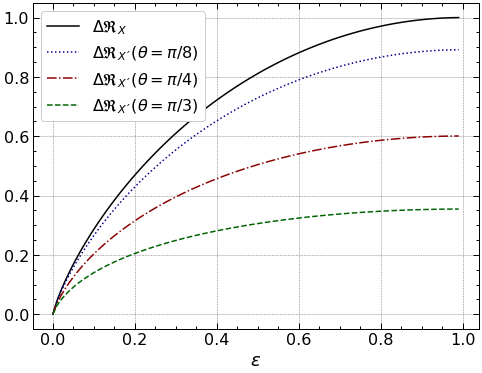

In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid'])

x1 = np.pi/8 
x2 = np.pi/4
x3 = np.pi/3
x4 = np.pi/2

w = np.arange(0.0001, 1, 0.01)

lw1 = 0.5*(1 + (1 - w))
lw2 = 0.5*(1 - (1 - w))

lx1 = 0.5*(1 + np.sin(x1)) 
lx2 = 0.5*(1 - np.sin(x1)) 

lxw1 = 0.5*(1 + (1 - w)*np.sin(x1))
lxw2 = 0.5*(1 - (1 - w)*np.sin(x1))

Sw = -lw1*np.log2(lw1) -lw2*np.log2(lw2)
Sx = -lx1*np.log2(lx1) -lx2*np.log2(lx2) + 0*w
Sxw = -lxw1*np.log2(lxw1) -lxw2*np.log2(lxw2)

lx11 = 0.5*(1 + np.sin(x2)) 
lx22 = 0.5*(1 - np.sin(x2)) 

lxw11 = 0.5*(1 + (1 - w)*np.sin(x2))
lxw22 = 0.5*(1 - (1 - w)*np.sin(x2))

Sw1 = -lw1*np.log2(lw1) -lw2*np.log2(lw2)
Sx1 = -lx11*np.log2(lx11) -lx22*np.log2(lx22) + 0*w
Sxw1 = -lxw11*np.log2(lxw11) -lxw22*np.log2(lxw22)

lx111 = 0.5*(1 + np.sin(x3)) 
lx222 = 0.5*(1 - np.sin(x3)) 

lxw111 = 0.5*(1 + (1 - w)*np.sin(x3))
lxw222 = 0.5*(1 - (1 - w)*np.sin(x3))

Sw2 = -lw1*np.log2(lw1) -lw2*np.log2(lw2)
Sx2 = -lx111*np.log2(lx111) -lx222*np.log2(lx222) + 0*w
Sxw2 = -lxw111*np.log2(lxw111) -lxw222*np.log2(lxw222)


lx1111 = 0.5*(1 + np.sin(x4)) 
lx2222 = 0.5*(1 - np.sin(x4)) 

lxw1111 = 0.5*(1 + (1 - w)*np.sin(x4))
lxw2222 = 0.5*(1 - (1 - w)*np.sin(x4))

Sw3 = -lw1*np.log2(lw1) -lw2*np.log2(lw2)
Sx3 = -lx1111*np.log2(lx1111) -lx2222*np.log2(lx2222) + 0*w
Sxw3 = -lxw1111*np.log2(lxw1111) -lxw2222*np.log2(lxw2222) + 0*w

plt.plot(w, Sw, color="black", linewidth=1.5, linestyle="-", label= r'$\Delta \mathfrak{R}_{X}$')
plt.plot(w, Sx + Sw - Sxw, color="darkblue", linewidth=1.5, linestyle=":", label= r'$\Delta \mathfrak{R}_{X´}(\theta  = \pi/8)$')
plt.plot(w, Sx1 + Sw - Sxw1, color="darkred", linewidth=1.5, linestyle="-.", label= r'$\Delta \mathfrak{R}_{X´}(\theta  = \pi/4)$')
plt.plot(w, Sx2 + Sw - Sxw2, color="darkgreen", linewidth=1.5, linestyle="--", label= r'$\Delta \mathfrak{R}_{X´}(\theta  = \pi/3)$')
#plt.plot(w, Sx3 + Sw3 - Sxw3, color="orange", linewidth=1.5, linestyle=(0, (3, 10, 1, 10)), label= r'$Sxw$')

#plt.plot(x, Sl3, color="red", linewidth=1.5, linestyle=":", label= r'$\frac{r_s}{r} = 0.95$')

plt.xlabel(r'$\epsilon$',fontsize = 18); #plt.ylabel(r'$S$', fontsize=18)
plt.legend(fontsize=16)
plt.savefig('varrea.pdf', format='pdf',dpi = 1200, bbox_inches='tight')
plt.show()

A fim de testar a expressão
\begin{align}
\Delta \mathcal{R}_{X'}(\rho)& = \mathcal{I}_{X'}(\rho) - \mathcal{I}_{X'}(\Phi^{\epsilon}_X(\rho)) \\
& = S(\Phi_{X'}(\rho)) + S(\Phi^{\epsilon}_X(\rho)) - S(\rho) - S(\Phi_{X'}(\Phi^{\epsilon}_X(\rho)))\\
\end{align}
é necessário implementar os seguintes mapas:
\begin{align}
\rho, \Phi^{\epsilon}_X(\rho), \Phi_{X'}(\Phi^{\epsilon}_X(\rho)), \Phi_{X'}(\rho).  
\end{align}

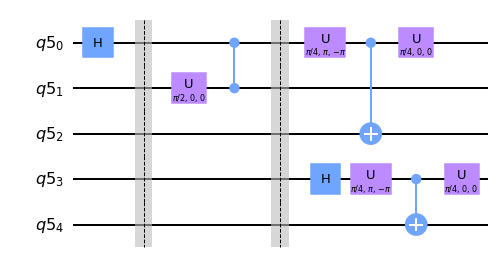

In [20]:
import numpy as np
qr = QuantumRegister(5); 
qc = qiskit.QuantumCircuit(qr);

### preparar o estado
qc.h(qr[0])
qc.barrier()
        
### medidas fracas não reveladas na base 0,1 do estado preparado
th1 = np.pi/2 
ph1 = 0 
lb1 = 0
qc.u(th1, ph1, lb1, qr[1]); 
qc.cz(qr[0], qr[1]);
qc.barrier()

### medidas não reveladas na base n_0, n_1 do estado anterior

qc.u(math.pi/4, math.pi, -math.pi, qr[0])
qc.cx(qr[0],qr[2]);
qc.u(math.pi/4, 0, 0, qr[0])

### medidas não reveladas na base n_0,n_1 no estado preparado

qc.h(qr[3])

qc.u(math.pi/4, math.pi, -math.pi, qr[3])
qc.cx(qr[3],qr[4]);
qc.u(math.pi/4, 0, 0, qr[3])

qc.draw(output='mpl')


In [16]:
qr = QuantumRegister(5); 
qc = qiskit.QuantumCircuit(qr);

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


th_min = 0; th_max = math.pi/2; N = 10; dth = (th_max-th_min)/N; th = -dth + 10**-1; thv = np.zeros(N+1)

I = np.zeros(N+1)
V = np.zeros(N+1)
J = np.zeros(N+1)

for j in range(0, N+1):
    qr = QuantumRegister(5)
    qc = qiskit.QuantumCircuit(qr)
    th += dth
    thv[j] = th 
    
    # State preparation
    th1 = th; ph1 = 0; lb1 = 0 # angles for the state preparation
    
    qc.h(qr[0])
       
    qc.u(th1, ph1, lb1, qr[1]); #print('prep = ',th1, ph1, lb1)
    qc.u(math.pi/4, math.pi, -math.pi, qr[0])
    qc.cz(qr[0], qr[1]);
    qc.u(math.pi/4, 0, 0, qr[0])
        
    #print('meas = ',th2, ph2, lb2)
    # qstate tomography for Pi(rho)
    qst_qc = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
    
    job = qiskit.execute(qst_qc, Aer.get_backend('qasm_simulator'), shots = 8192) # executes the qst
    qstf_qc = StateTomographyFitter(job.result(), qst_qc) # fits the data to extract rho
    rho10_meas = qstf_qc.fit(method='lstsq'); 
    rho0_meas = pTraceL_num(2, 2, rho10_meas); #print('Pi(rho) = ', rho0_meas)
    
    I[j] = von_neumann_num(rho0_meas) # C with reference to sigma_x
    
    
    qc.cx(qr[0],qr[2]);
    
    qst_qc1 = state_tomography_circuits(qc, [qr[0],qr[2]]) # defines the qcircuit to make qst
    
    job = qiskit.execute(qst_qc1, Aer.get_backend('qasm_simulator'), shots = 8192) # executes the qst
    qstf_qc1 = StateTomographyFitter(job.result(), qst_qc1) # fits the data to extract rho
    rho10_meas1 = qstf_qc1.fit(method='lstsq'); 
    rho0_meas1 = pTraceL_num(2, 2, rho10_meas1); #print('Pi(rho) = ', rho0_meas)

    V[j] = von_neumann_num(rho0_meas1)
    
    qc.h(qr[3])
    
    qc.cx(qr[3],qr[4]);
    
    qst_qc2 = state_tomography_circuits(qc, [qr[3],qr[4]]) # defines the qcircuit to make qst
    
    job = qiskit.execute(qst_qc2, Aer.get_backend('qasm_simulator'), shots = 8192) # executes the qst
    qstf_qc2 = StateTomographyFitter(job.result(), qst_qc2) # fits the data to extract rho
    rho10_meas2 = qstf_qc2.fit(method='lstsq'); 
    rho0_meas2 = pTraceL_num(2, 2, rho10_meas2); #print('Pi(rho) = ', rho0_meas)

    J[j] = von_neumann_num(rho0_meas2)


In [15]:
qr = QuantumRegister(2); 
qc = qiskit.QuantumCircuit(qr);

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


qc.h(qr[0])

qst_qc = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
job_dev = qiskit.execute(qst_qc, backend = device, shots = 8192); # executes the qst
print(job_dev.job_id());
job_monitor(job_dev);
job_dev_mit = meas_filter.apply(job_dev.result(), method='least_squares'); # error mitigation
qstf_qc_dev = StateTomographyFitter(job_dev_mit, qst_qc); # fits the data to extract rho
rho10_measE = qstf_qc_dev.fit(method = 'lstsq');
rho0_measE = pTraceL_num(2, 2, rho10_measE)

Se = von_neumann_num(rho0_measE)


qc.cx(qr[0],qr[1]);
    
qst_qc3 = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
job_dev3 = qiskit.execute(qst_qc3, backend = device, shots = 8192); # executes the qst
print(job_dev3.job_id());
job_monitor(job_dev3);    
job_dev_mit3 = meas_filter.apply(job_dev3.result(), method='least_squares'); # error mitigation
qstf_qc_dev3 = StateTomographyFitter(job_dev_mit3, qst_qc3); # fits the data to extract rho
rho10_meas3 = qstf_qc_dev3.fit(method='lstsq'); 
rho0_meas3 = pTraceL_num(2, 2, rho10_meas3); #print('Pi(rho) = ', rho0_meas)

Je = von_neumann_num(rho0_meas3)



61ab591c2e6f453f459c7ad1
Job Status: job has successfully run
61ab596bdcbe231fe3193ea8
Job Status: job has successfully run


In [95]:
Se

In [14]:
qr = QuantumRegister(3); 
qc = qiskit.QuantumCircuit(qr);

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


th_min = 0; th_max = math.pi/2; N = 10; dth = (th_max-th_min)/N; th = -dth + 10**-1; thv = np.zeros(N+1)

Ie = np.zeros(N+1)
Ve = np.zeros(N+1)

for j in range(0, N+1):
    qr = QuantumRegister(5)
    qc = qiskit.QuantumCircuit(qr)
    th += dth
    thv[j] = th 
    
    # State preparation
    th1 = th; ph1 = 0; lb1 = 0 # angles for the state preparation
    
    qc.h(qr[0])
    
    qc.u(th1, ph1, lb1, qr[1]); #print('prep = ',th1, ph1, lb1)
    qc.u(math.pi/4, math.pi, -math.pi, qr[0])
    qc.cz(qr[0], qr[1]);
    qc.u(math.pi/4, 0, 0, qr[0])
      
    #print('meas = ',th2, ph2, lb2)
    # qstate tomography for Pi(rho)
    
    qst_qc1 = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
    job_dev1 = qiskit.execute(qst_qc1, backend = device, shots = 8192); # executes the qst
    print(job_dev1.job_id());
    job_monitor(job_dev1);    
    job_dev_mit1 = meas_filter.apply(job_dev1.result(), method='least_squares'); # error mitigation
    qstf_qc_dev1 = StateTomographyFitter(job_dev_mit1, qst_qc1); # fits the data to extract rho
    rho10_meas1 = qstf_qc_dev1.fit(method='lstsq'); 
    rho0_meas1 = pTraceL_num(2, 2, rho10_meas1); #print('Pi(rho) = ', rho0_meas)
   
    Ie[j] = von_neumann_num(rho0_meas1) # C with reference to sigma_x
    
    
    qc.cx(qr[0],qr[2]);
   
    qst_qc2 = state_tomography_circuits(qc, [qr[0],qr[2]]) # defines the qcircuit to make qst
    
    job_dev2 = qiskit.execute(qst_qc2, backend = device, shots = 8192); # executes the qst
    print(job_dev2.job_id());
    job_monitor(job_dev2);    
    job_dev_mit2 = meas_filter.apply(job_dev2.result(), method='least_squares'); # error mitigation
    qstf_qc_dev2 = StateTomographyFitter(job_dev_mit2, qst_qc2); # fits the data to extract rho
    rho10_meas2 = qstf_qc_dev2.fit(method='lstsq'); 
    rho0_meas2 = pTraceL_num(2, 2, rho10_meas2); #print('Pi(rho) = ', rho0_meas)
 
    Ve[j] = von_neumann_num(rho0_meas2)
    
    

/home/marcos/anaconda3/lib/python3.7/site-packages/qiskit/ignis/verification/tomography/basis/circuits.py:468: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  prep += circuit
/home/marcos/anaconda3/lib/python3.7/site-packages/qiskit/circuit/quantumcircuit.py:942: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)
/home/marcos/anaconda3/lib/python3.7/site-packages/qiskit/ignis/verification/tomography/basis/circuits.py:478: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circ = prep + meas
/home/marcos/ana

61ab4a6cbf880381243094e5
Job Status: job has successfully run
61ab4a9dfd942662c4c6f753
Job Status: job has successfully run
61ab4b45a880fe3c3464577c
Job Status: job has successfully run
61ab4bf42e6f455cb79c7ab6
Job Status: job has successfully run
61ab4c99ac813a0a98faa879
Job Status: job has successfully run
61ab4d4ddcbe2305f6193e88
Job Status: job has successfully run
61ab4df7dcbe230c04193e8b
Job Status: job has successfully run
61ab4ea8bd9cd2cd4f56aa31
Job Status: job has successfully run
61ab4f55fd94267eb4c6f766
Job Status: job has successfully run
61ab5000fd9426370cc6f76a
Job Status: job has successfully run
61ab50aabd9cd2fa2d56aa36
Job Status: job has successfully run
61ab5152d73dea07b93732b2
Job Status: job has successfully run
61ab5200f15b03080d9a1f4e
Job Status: job has successfully run
61ab52a6f15b0314349a1f51
Job Status: job has successfully run
61ab5352f15b0337c39a1f55
Job Status: job has successfully run
61ab5415a880fe74d4645796
Job Status: job has successfully run
61ab54af

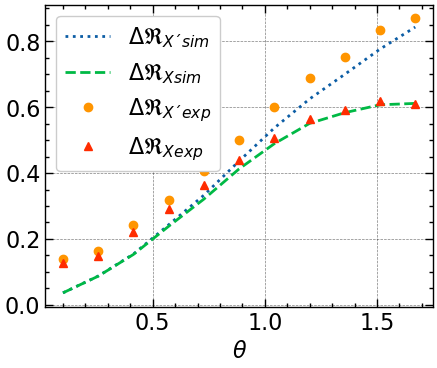

In [19]:
import matplotlib
plt.style.use(['science', 'notebook', 'grid'])    
    
    
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (5,4), dpi = 100)
#plt.plot(thv, Pv, 'o--',label = r'$P_{vn}^{\sigma_{z}}(\rho_{sim})$')
plt.plot(thv, J + I - V, ':', label = r'$\Delta \mathfrak{R}_{X´sim}$')
plt.plot(thv, I, '--', label = r'$\Delta \mathfrak{R}_{X sim}$')
plt.plot(thv, Je + Ie - Ve - Se, 'o', label = r'$\Delta \mathfrak{R}_{X´exp}$')
plt.plot(thv, Ie - Se, '^', label = r'$\Delta \mathfrak{R}_{X exp}$')

#plt.plot(thv, IE, 'rx:', label = r'$\mathcal{R}_E$')

#plt.plot(thv, PvE, ':', label = r'$P_{vn}^{\sigma_{z}}(\rho_{exp})$')
plt.xlabel(r'$\theta$'); 
    #plt.legend(loc = 'center right', bbox_to_anchor=(th_max-0.05, 0.5))
plt.legend(loc = 'best')
plt.savefig('varexp2.pdf', format='pdf',dpi = 1200, bbox_inches='tight')
plt.show()

#### Invertendo: monitoramente de $X'$ de modo que $\Delta \mathcal{R}_X \ge \Delta \mathcal{R}_{X'}$ 


Agora, consideremos que o monitoramento é realizado pelo observável $X' = \hat{n} \cdot \vec{\sigma}$, enquanto que comparamento a variação da realidade de $X = \sigma_z$ com $X'$ sob tal monitoramento. Assim, supondo inicial que o sistema é preparado em $| \psi \rangle = | + \rangle$, então
\begin{align}
& \Phi^{\epsilon}_{n}(\rho_{\psi}) = \epsilon \rho_{\psi} + (1 - \epsilon) \Phi_n(\rho_{\psi}) = \frac{1}{2}\begin{bmatrix}1 + \cos(\theta)\sin(\theta)(1 - \epsilon) & \sin^2(\theta) + \epsilon \cos^2(\theta) \\ \sin^2(\theta) + \epsilon \cos^2(\theta) & 1 - \cos(\theta)\sin(\theta)(1 - \epsilon) \end{bmatrix},\\
& \Phi_X\Big(\Phi^{\epsilon}_{n}(\rho_{\psi}) \Big) =  \frac{1}{2}\begin{bmatrix}1 + \cos(\theta)\sin(\theta)(1 - \epsilon) & 0 \\ 0 & 1 - \cos(\theta)\sin(\theta)(1 - \epsilon) \end{bmatrix},\\
& \Phi_X (\rho_{\psi}) = I/2
\end{align}

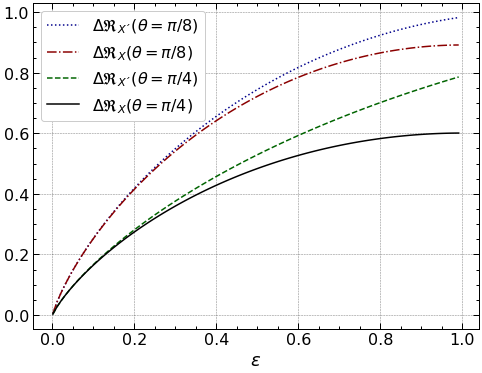

In [34]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid'])

x1 = np.pi/8 
x2 = np.pi/4

w = np.arange(0.001, 1, 0.01)


c1 = w**2*(np.sin(x1)*np.cos(x1))**2 + ((1 - w) + w*(np.sin(x1))**2)**2
c2 = w**2*(np.sin(x2)*np.cos(x2))**2 + ((1 - w) + w*(np.sin(x2))**2)**2

lx1 = 0.5*(1 + np.sqrt(c1))
lx2 = 0.5*(1 - np.sqrt(c1))

lxw1 = 0.5*(1 + np.cos(x1)*np.sin(x1)*w)
lxw2 = 0.5*(1 - np.cos(x1)*np.sin(x1)*w)


Sw = 1 + 0*w
Sx = -lx1*np.log2(lx1) -lx2*np.log2(lx2) 
Sxw = -lxw1*np.log2(lxw1) -lxw2*np.log2(lxw2)

#--------

lx11 = 0.5*(1 + np.sqrt(c2))
lx22 = 0.5*(1 - np.sqrt(c2))

lxw11 = 0.5*(1 + w*np.cos(x2)*np.sin(x2))
lxw22 = 0.5*(1 - w*np.cos(x2)*np.sin(x2))

Sw = 1 + 0*w
Sx1 = -lx11*np.log2(lx11) -lx22*np.log2(lx22) 
Sxw1 = -lxw11*np.log2(lxw11) -lxw22*np.log2(lxw22)



plt.plot(w, Sx + Sw - Sxw, color="darkblue", linewidth=1.5, linestyle=":", label= r'$\Delta \mathfrak{R}_{X´}(\theta = \pi/8)$')
plt.plot(w, Sx, color="darkred", linewidth=1.5, linestyle="-.", label= r'$\Delta \mathfrak{R}_{X}(\theta = \pi/8)$')
plt.plot(w, Sx1 + Sw - Sxw1, color="darkgreen", linewidth=1.5, linestyle="--", label= r'$\Delta \mathfrak{R}_{X´}(\theta = \pi/4)$')
plt.plot(w, Sx1, color="black", linewidth=1.5, linestyle="-", label= r'$\Delta \mathfrak{R}_{X}(\theta = \pi/4)$')

#plt.plot(x, Sl3, color="red", linewidth=1.5, linestyle=":", label= r'$\frac{r_s}{r} = 0.95$')

plt.xlabel(r'$\epsilon$',fontsize = 18);
plt.legend(fontsize=16)
plt.savefig('varrea1.pdf', format='pdf',dpi = 1200, bbox_inches='tight')
plt.show()

In [26]:
qr = QuantumRegister(5); 
qc = qiskit.QuantumCircuit(qr);

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


th_min = 0; th_max = math.pi/2; N = 10; dth = (th_max-th_min)/N; th = -dth + 10**-1; thv = np.zeros(N+1)
I = np.zeros(N+1) 
S = np.zeros(N+1) 
J = np.zeros(N+1) 


for j in range(0, N+1):
    qr = QuantumRegister(5)
    qc = qiskit.QuantumCircuit(qr)
    th += dth
    thv[j] = th 
    
    # State preparation
    th1 = th; ph1 = 0; lb1 = 0 # angles for the state preparation
    
    qc.h(qr[0])
    
    qc.u(th1, ph1, lb1, qr[1]); #print('prep = ',th1, ph1, lb1)
    qc.u(math.pi/4, math.pi, -math.pi, qr[0])
    qc.cz(qr[0], qr[1]);
    qc.u(math.pi/4, 0, 0, qr[0])
    
    #print('meas = ',th2, ph2, lb2)
    # qstate tomography for Pi(rho)
    qst_qc = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
    
    job = qiskit.execute(qst_qc, Aer.get_backend('qasm_simulator'), shots = 8192) # executes the qst
    qstf_qc = StateTomographyFitter(job.result(), qst_qc) # fits the data to extract rho
    rho10_meas = qstf_qc.fit(method='lstsq'); 
    rho0_meas = pTraceL_num(2, 2, rho10_meas); #print('Pi(rho) = ', rho0_meas)
    
    I[j] = von_neumann_num(rho0_meas) # C with reference to sigma_x
    
    qc.cx(qr[0],qr[2]);
    
    qst_qc1 = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
    
    job = qiskit.execute(qst_qc1, Aer.get_backend('qasm_simulator'), shots = 8192) # executes the qst
    qstf_qc1 = StateTomographyFitter(job.result(), qst_qc1) # fits the data to extract rho
    rho10_meas1 = qstf_qc1.fit(method='lstsq'); 
    rho0_meas1 = pTraceL_num(2, 2, rho10_meas1); #print('Pi(rho) = ', rho0_meas)

    S[j] = von_neumann_num(rho0_meas1)
    
    
    qc.h(qr[3])

    qc.cx(qr[3],qr[4]);
    
    qst_qc2 = state_tomography_circuits(qc, [qr[3],qr[4]]) # defines the qcircuit to make qst
    
    job = qiskit.execute(qst_qc2, Aer.get_backend('qasm_simulator'), shots = 8192) # executes the qst
    qstf_qc2 = StateTomographyFitter(job.result(), qst_qc2) # fits the data to extract rho
    rho10_meas2 = qstf_qc2.fit(method='lstsq'); 
    rho0_meas2 = pTraceL_num(2, 2, rho10_meas2); #print('Pi(rho) = ', rho0_meas)

    J[j] = von_neumann_num(rho0_meas2)


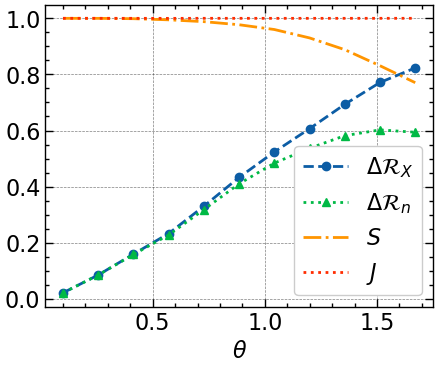

In [113]:
import matplotlib
plt.style.use(['science', 'notebook', 'grid'])    
    
    
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (5,4), dpi = 100)
#plt.plot(thv, Pv, 'o--',label = r'$P_{vn}^{\sigma_{z}}(\rho_{sim})$')
plt.plot(thv, J + I - S, 'o--', label = r'$\Delta \mathcal{R}_X$')
plt.plot(thv, I, '^:', label = r'$\Delta \mathcal{R}_n$')
plt.plot(thv, S, '-.', label = r'$S$')
plt.plot(thv, J, ':', label = r'$J$')

#plt.plot(thv, IE, 'rx:', label = r'$\mathcal{R}_E$')

#plt.plot(thv, PvE, ':', label = r'$P_{vn}^{\sigma_{z}}(\rho_{exp})$')
plt.xlabel(r'$\theta$'); 
    #plt.legend(loc = 'center right', bbox_to_anchor=(th_max-0.05, 0.5))
plt.legend(loc = 'best')
    #plt.savefig(path+'psi_plot1.png', format = 'png', dpi = 200)
plt.show()

In [25]:
qr = QuantumRegister(5); 
qc = qiskit.QuantumCircuit(qr);

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


th_min = 0; th_max = math.pi/2; N = 10; dth = (th_max-th_min)/N; th = -dth + 10**-1; thv = np.zeros(N+1)
Ii = np.zeros(N+1) 
Ss = np.zeros(N+1) 
Jj = np.zeros(N+1) 


for j in range(0, N+1):
    qr = QuantumRegister(5)
    qc = qiskit.QuantumCircuit(qr)
    th += dth
    thv[j] = th 
    
    # State preparation
    th1 = th; ph1 = 0; lb1 = 0 # angles for the state preparation
    
    qc.h(qr[0])
    
    qc.u(th1, ph1, lb1, qr[1]); #print('prep = ',th1, ph1, lb1)
    qc.u(math.pi/8, math.pi, -math.pi, qr[0])
    qc.cz(qr[0], qr[1]);
    qc.u(math.pi/8, 0, 0, qr[0])
    
    #print('meas = ',th2, ph2, lb2)
    # qstate tomography for Pi(rho)
    qst_qc = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
    
    job = qiskit.execute(qst_qc, Aer.get_backend('qasm_simulator'), shots = 8192) # executes the qst
    qstf_qc = StateTomographyFitter(job.result(), qst_qc) # fits the data to extract rho
    rho10_meas = qstf_qc.fit(method='lstsq'); 
    rho0_meas = pTraceL_num(2, 2, rho10_meas); #print('Pi(rho) = ', rho0_meas)
    
    Ii[j] = von_neumann_num(rho0_meas) # C with reference to sigma_x
    
    qc.cx(qr[0],qr[2]);
    
    qst_qc1 = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
    
    job = qiskit.execute(qst_qc1, Aer.get_backend('qasm_simulator'), shots = 8192) # executes the qst
    qstf_qc1 = StateTomographyFitter(job.result(), qst_qc1) # fits the data to extract rho
    rho10_meas1 = qstf_qc1.fit(method='lstsq'); 
    rho0_meas1 = pTraceL_num(2, 2, rho10_meas1); #print('Pi(rho) = ', rho0_meas)

    Ss[j] = von_neumann_num(rho0_meas1)
    
    
    qc.h(qr[3])

    qc.cx(qr[3],qr[4]);
    
    qst_qc2 = state_tomography_circuits(qc, [qr[3],qr[4]]) # defines the qcircuit to make qst
    
    job = qiskit.execute(qst_qc2, Aer.get_backend('qasm_simulator'), shots = 8192) # executes the qst
    qstf_qc2 = StateTomographyFitter(job.result(), qst_qc2) # fits the data to extract rho
    rho10_meas2 = qstf_qc2.fit(method='lstsq'); 
    rho0_meas2 = pTraceL_num(2, 2, rho10_meas2); #print('Pi(rho) = ', rho0_meas)

    Jj[j] = von_neumann_num(rho0_meas2)


/home/marcos/anaconda3/lib/python3.7/site-packages/qiskit/ignis/verification/tomography/basis/circuits.py:468: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  prep += circuit
/home/marcos/anaconda3/lib/python3.7/site-packages/qiskit/circuit/quantumcircuit.py:942: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)
/home/marcos/anaconda3/lib/python3.7/site-packages/qiskit/ignis/verification/tomography/basis/circuits.py:478: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circ = prep + meas
/home/marcos/ana

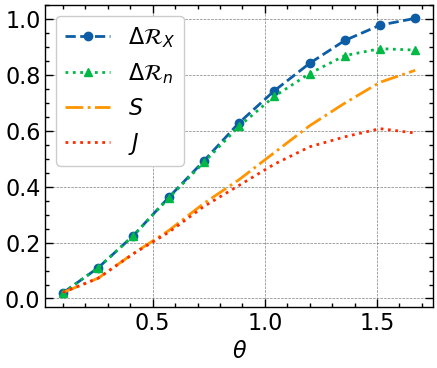

In [27]:
import matplotlib
plt.style.use(['science', 'notebook', 'grid'])    
    
    
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (5,4), dpi = 100)
#plt.plot(thv, Pv, 'o--',label = r'$P_{vn}^{\sigma_{z}}(\rho_{sim})$')
plt.plot(thv, Jj + Ii - Ss, 'o--', label = r'$\Delta \mathcal{R}_X$')
plt.plot(thv, Ii, '^:', label = r'$\Delta \mathcal{R}_n$')
plt.plot(thv, J + I - S, '-.', label = r'$S$')
plt.plot(thv, I, ':', label = r'$J$')

#plt.plot(thv, IE, 'rx:', label = r'$\mathcal{R}_E$')

#plt.plot(thv, PvE, ':', label = r'$P_{vn}^{\sigma_{z}}(\rho_{exp})$')
plt.xlabel(r'$\theta$'); 
    #plt.legend(loc = 'center right', bbox_to_anchor=(th_max-0.05, 0.5))
plt.legend(loc = 'best')
    #plt.savefig(path+'psi_plot1.png', format = 'png', dpi = 200)
plt.show()